# Working with GridImage: Grid-Specific Features

This tutorial focuses on `GridImage` - a specialized class for analyzing arrayed microbe colonies on solid media agar plates.

## Prerequisites

**Before starting this tutorial**, please complete the {doc} `Image` to understand the core `Image` class features (rgb, gray, enh_gray, objmap, objects, etc.).

## What Makes GridImage Special?

`GridImage` extends `Image` with grid-specific functionality:
- Automatic grid alignment to detected colonies
- Grid position tracking (row, column, section)
- Grid-based visualization
- Position information in measurements

## When to Use GridImage

✅ **Use GridImage** for: 96-well plates, 384-well plates, any arrayed format
❌ **Use regular Image** for: Single colonies, random arrangements

Let's explore the grid-specific features!

## Setup: Import Libraries

First, let's import the phenotypic library (commonly abbreviated as `pht`).


In [1]:
import phenotypic as pht
import numpy as np
import matplotlib.pyplot as plt

## Part 2: Grid-Specific Components

Now let's explore the components that are unique to `GridImage`:

### Grid Components

1. **`grid_finder`**: The algorithm that determines where grid lines should be placed
   - Default: `AutoGridFinder` - automatically aligns to detected colonies
   - Alternative: `ManualGridFinder` - for manual grid specification

2. **`grid`**: An accessor object that provides grid-specific operations
   - Access grid information
   - Get individual grid sections
   - Visualize rows and columns

3. **`nrows` and `ncols`**: Grid dimensions (can be adjusted)

4. **`show_overlay()`**: Enhanced visualization with gridlines and labels


(<Figure size 800x600 with 1 Axes>, <Axes: >)

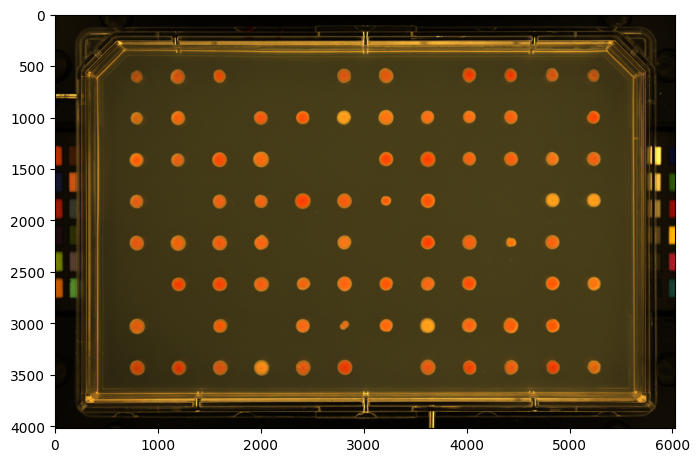

In [2]:
image = pht.data.load_imager_plate(mode="GridImage")
image.show()

Cropped type: <class 'phenotypic.core._image.Image'>
Converted back: <class 'phenotypic.core._grid_image.GridImage'>


(<Figure size 800x600 with 1 Axes>, <Axes: >)

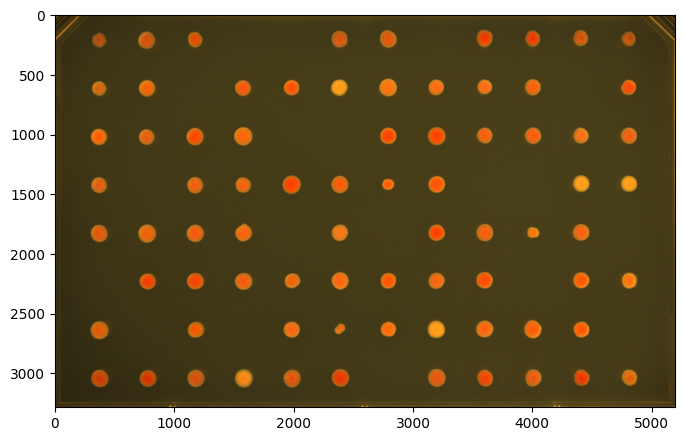

In [3]:
image = image[390:3675, 425:5620]  # Cropping a GridImage returns a regular Image
print(f"Cropped type: {type(image)}")

image = pht.GridImage(image)
print(f"Converted back: {type(image)}")

image.show()

In [4]:
# Examine grid properties
print(f"Grid finder type: {type(image.grid_finder).__name__}")
print(f"Number of rows: {image.nrows}")
print(f"Number of columns: {image.ncols}")
print(f"Total sections: {image.nrows*image.ncols}")

Grid finder type: AutoGridFinder
Number of rows: 8
Number of columns: 12
Total sections: 96


(<Figure size 900x1000 with 1 Axes>, <Axes: >)

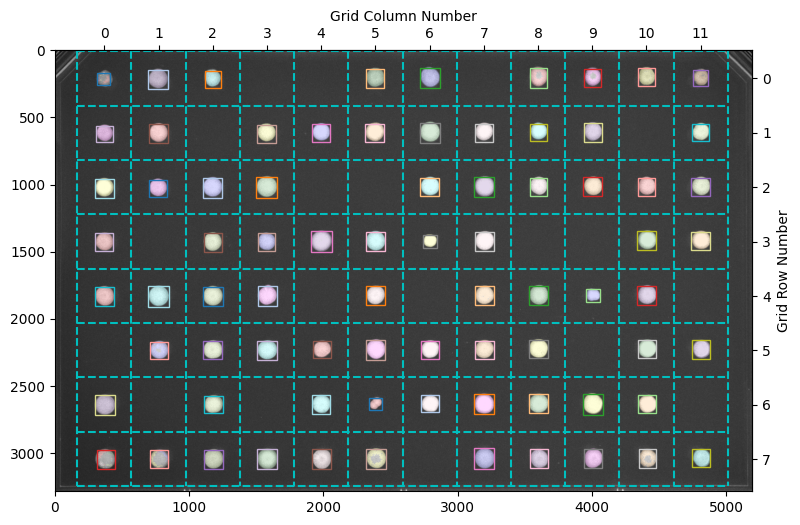

In [5]:
pht.detect.WatershedDetector().apply(image, inplace=True)

# The S&P imager uses plates that have a corner cutthing through the image, so we remove it with BorderObjectRemover
pht.refine.BorderObjectRemover(100).apply(image, inplace=True)
image.show_overlay()

Notice how:
- **Cyan dashed lines** show the grid boundaries
- **Column numbers** appear at the top (0-11)
- **Row numbers** appear on the right (0-7)
- **Colored boxes** show which colonies belong to which grid section


## Part 4: Accessing Grid Information

After detection, the grid is automatically aligned to the colonies. We can access detailed grid assignment information using `grid.info()`.


In [6]:

# Get grid information for all colonies
grid_info = image.grid.info(include_metadata=True)

# Display first 10 colonies
print("Grid Information for Detected Colonies:")
print()
grid_info.head(10)


Grid Information for Detected Colonies:



,Metadata_BitDepth,Metadata_ImageType,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum
0,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,13,204.124940,3599.078722,133,3535,278,3667,0,8,8
1,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,14,208.329764,2791.344287,134,2722,284,2865,0,6,6
2,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,15,201.530980,4404.363277,135,4345,267,4467,0,10,10
3,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,17,206.936365,4002.497164,138,3941,274,4064,0,9,9
4,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,18,210.003521,2384.580162,141,2318,281,2452,0,5,5
5,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,19,219.281534,768.005695,147,697,291,839,0,1,1
6,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,20,210.920644,4810.025350,150,4754,268,4864,0,11,11
7,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,21,214.893599,1173.636205,152,1117,279,1235,0,2,2
8,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,23,179.447115,361.264423,169,355,194,373,0,0,0
9,16,GridImage,c1c9cb8a-5d67-4239-925e-74468335236a,24,196.233577,340.080292,189,331,204,349,0,0,0


### Understanding Grid Columns

The grid information includes several important columns:

#### Position Information:
- **`RowNum`**: Which row the colony is in (0 to nrows-1)
- **`ColNum`**: Which column the colony is in (0 to ncols-1)
- **`SectionNum`**: Unique section ID (numbered left-to-right, top-to-bottom)

#### Bounding Box Coordinates:
- **`MinRowCoord`, `MaxRowCoord`**: Minimum and maximum row coordinates
- **`MinColCoord`, `MaxColCoord`**: Minimum and maximum column coordinates
- **`CenterRowCoord`, `CenterColCoord`**: Center coordinates of the colony

#### Metadata:
- **`Metadata_ImageName`**: Name of the image
- **`Metadata_ImageType`**: Type designation (GridImage)


In [7]:
# Example: Find all colonies in row 3
row_3_colonies = grid_info[grid_info['Grid_RowNum'] == 3]
print(f"Colonies in row 3: {len(row_3_colonies)}")
print()
row_3_colonies[['Grid_RowNum', 'Grid_ColNum', 'Grid_SectionNum']]


Colonies in row 3: 9



,Grid_RowNum,Grid_ColNum,Grid_SectionNum
34,3,10,46
35,3,4,40
36,3,11,47
37,3,5,41
38,3,7,43
39,3,2,38
40,3,0,36
41,3,3,39
42,3,6,42


In [8]:
# Example: Find colonies in a specific section (e.g., section 25)
section_25 = grid_info[grid_info['Grid_SectionNum'] == 25]
if len(section_25) > 0:
    print(
            f"Section 25 corresponds to row {section_25['Grid_RowNum'].iloc[0]}, column {section_25['Grid_ColNum'].iloc[0]}")
    print(f"Number of colonies detected: {len(section_25)}")
else:
    print("No colonies detected in section 25")


Section 25 corresponds to row 2, column 1
Number of colonies detected: 1


## Part 5: Working with Grid Sections

You can extract individual grid sections (wells) from the plate. Sections are numbered from 0 to (nrows × ncols - 1), going left-to-right, top-to-bottom.


In [9]:
# Access the first grid section (top-left)
section_0 = image.grid[0]

print(f"Section 0 shape: {section_0.shape}")
print(f"Number of objects in section 0: {section_0.num_objects}")


Section 0 shape: (405, 404, 3)
Number of objects in section 0: 0


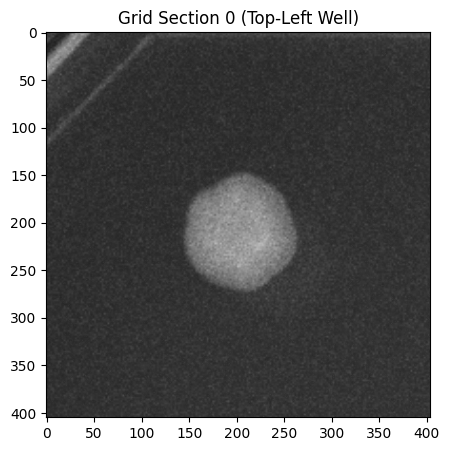

In [10]:
# Visualize a single section
fig, ax = section_0.show_overlay()
plt.title("Grid Section 0 (Top-Left Well)")
plt.show()


In [ ]:
# Compare multiple sections
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

sections_to_show = [0, 1, 2, 12, 13, 14]  # First two rows, first 3 columns

for idx, section_num in enumerate(sections_to_show):
    section = image.grid[section_num]
    row = section_num//image.ncols
    col = section_num%image.ncols

    section.show(ax=axes[idx])
    axes[idx].set_title(f"Section {section_num}\(Row {row}, Col {col})")
    axes[idx].axis('off')

plt.tight_layout()
plt.show()


## Part 6: Advanced Grid Visualization

GridImage provides specialized visualization methods to highlight rows and columns.


### Visualizing by Row

Color colonies according to which row they belong to:


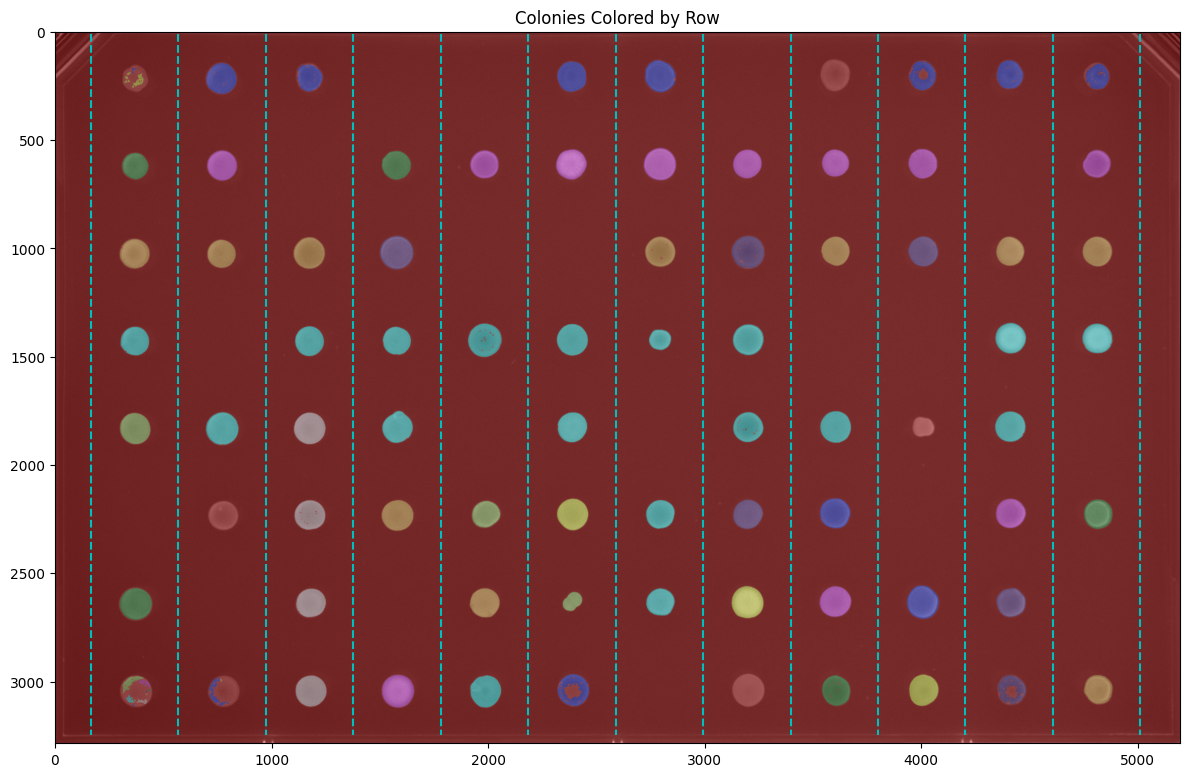

In [27]:
# Show colonies colored by row
fig, ax = image.grid.show_row_overlay(show_gridlines=True, figsize=(12, 10))
plt.title("Colonies Colored by Row")
plt.show()


### Visualizing by Column

Color colonies according to which column they belong to:


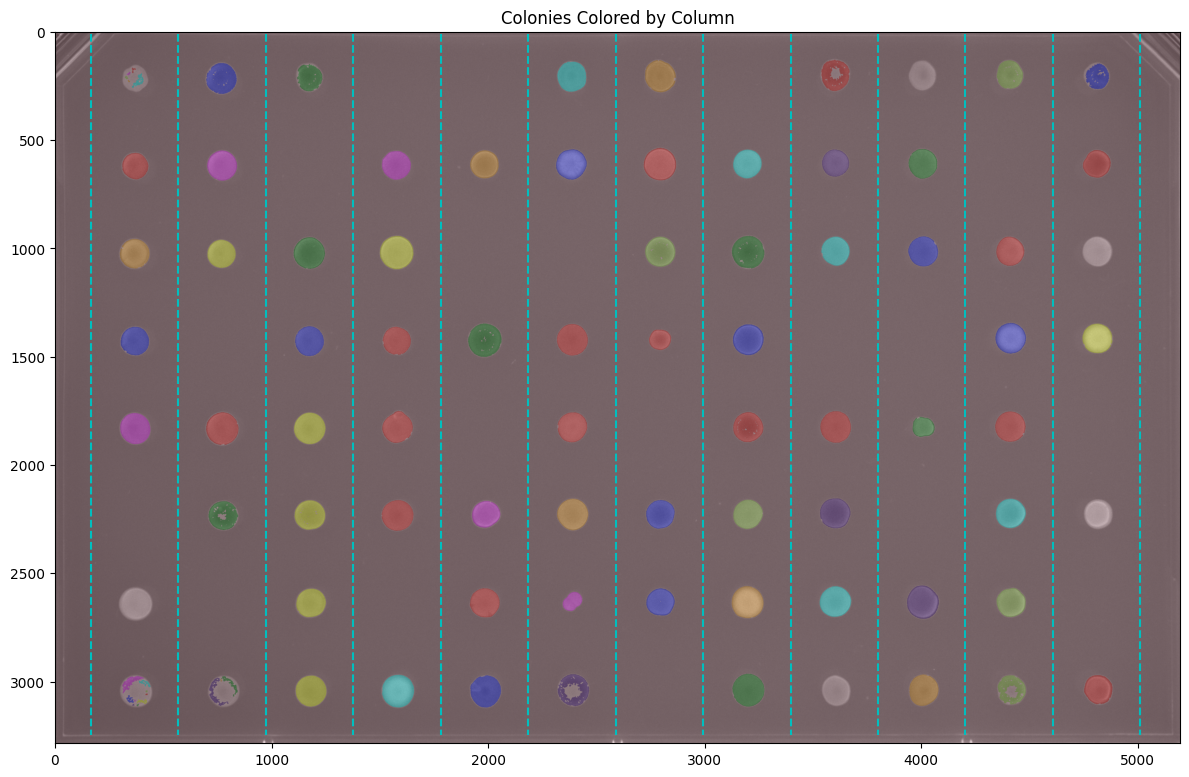

In [28]:
# Show colonies colored by column
fig, ax = image.grid.show_column_overlay(show_gridlines=True, figsize=(12, 10))
plt.title("Colonies Colored by Column")
plt.show()


### Accessing Grid Edges

You can get the exact pixel coordinates where the grid lines are placed:


In [29]:
# Get row and column edges
row_edges = image.grid.get_row_edges()
col_edges = image.grid.get_col_edges()

print(f"Row edges (pixel positions): {row_edges}")
print()
print(f"Column edges (pixel positions): {col_edges}")
print()
print(f"Number of row edges: {len(row_edges)} (should be nrows + 1 = {image.nrows + 1})")
print(f"Number of column edges: {len(col_edges)} (should be ncols + 1 = {image.ncols + 1})")


Row edges (pixel positions): [   8  413  818 1223 1628 2032 2437 2842 3247]

Column edges (pixel positions): [ 166  570  974 1378 1781 2185 2589 2993 3397 3800 4204 4608 5012]

Number of row edges: 9 (should be nrows + 1 = 9)
Number of column edges: 13 (should be ncols + 1 = 13)


## Part 8: Making Measurements with Grid Data

Now let's measure colony properties. The grid information is automatically included in the measurements!


In [34]:
from phenotypic.measure import MeasureSize

# Create a size measurement module
size_measurer = MeasureSize()

# Measure all colonies
measurements = size_measurer.measure(image, include_meta=True)

print(f"Measured {len(measurements)} colonies")
print()
measurements.head(10)


Measured 93 colonies



,Metadata_BitDepth,Metadata_ImageType,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,Size_Area,Size_IntegratedIntensity
0,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,13,204.124940,3599.078722,133,3535,278,3667,0,8,8,12398.0,5066.287074
1,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,14,208.329764,2791.344287,134,2722,284,2865,0,6,6,16251.0,7346.723784
2,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,15,201.530980,4404.363277,135,4345,267,4467,0,10,10,12379.0,5321.740338
3,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,17,206.936365,4002.497164,138,3941,274,4064,0,9,9,10403.0,4186.806565
4,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,18,210.003521,2384.580162,141,2318,281,2452,0,5,5,14770.0,6395.754508
5,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,19,219.281534,768.005695,147,697,291,839,0,1,1,15277.0,6505.189577
6,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,20,210.920644,4810.025350,150,4754,268,4864,0,11,11,9073.0,3621.594647
7,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,21,214.893599,1173.636205,152,1117,279,1235,0,2,2,10921.0,4626.649777
8,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,23,179.447115,361.264423,169,355,194,373,0,0,0,208.0,78.395138
9,16,GridImage,468de1d8-642a-4e90-af6b-4eb3d273425f,24,196.233577,340.080292,189,331,204,349,0,0,0,137.0,51.900798


### Understanding Measurement Columns

The measurements include:

**Size Measurements:**
- **`Shape_Area`**: Colony area in pixels
- **`Shape_EquivalentDiameter`**: Diameter of a circle with the same area
- **`Shape_Perimeter`**: Colony perimeter length

**Grid Information** (automatically included!):
- **`RowNum`, `ColNum`, `SectionNum`**: Position in the grid

**Metadata:**
- **`Metadata_ImageName`**, **`Metadata_ImageType`**: Image information


In [38]:
# Analyze measurements by row
import pandas as pd

row_summary = measurements.groupby('Grid_RowNum')['Size_Area'].agg(['mean', 'std', 'count'])
row_summary.columns = ['Mean Area', 'Std Area', 'Colony Count']

print("Colony Area Summary by Row:")
print()
row_summary


Colony Area Summary by Row:



/var/folders/78/rnctrlmn5kj996kjnq_mmqlh0000gn/T/ipykernel_87268/3953395669.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  row_summary = measurements.groupby('Grid_RowNum')['Size_Area'].agg(['mean', 'std', 'count'])


,Mean Area,Std Area,Colony Count
Grid_RowNum,,,
0,7393.571429,6616.045678,14
1,13937.600000,1765.069353,10
2,15187.100000,1774.201695,10
3,14365.555556,2939.623365,9
4,14863.222222,2898.702157,9
5,14514.100000,1302.852550,10
6,14389.111111,3660.432196,9
7,6435.590909,7254.329451,22


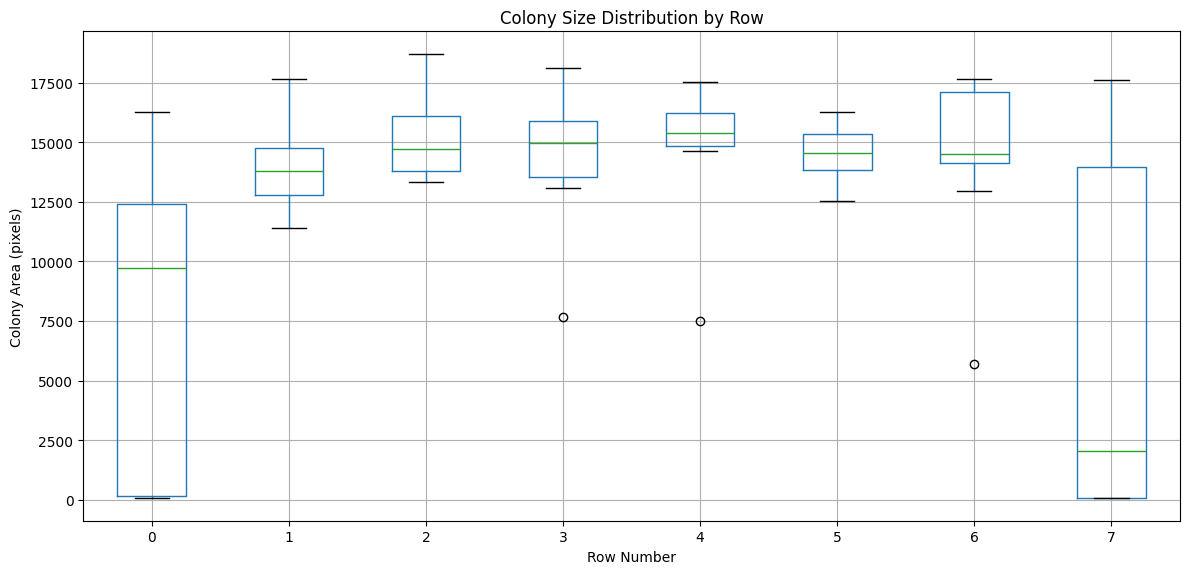

In [40]:
# Visualize area distribution by row
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
measurements.boxplot(column='Size_Area', by='Grid_RowNum', ax=plt.gca())
plt.xlabel('Row Number')
plt.ylabel('Colony Area (pixels)')
plt.title('Colony Size Distribution by Row')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()


### Exporting Data for Further Analysis

You can easily export measurements to CSV for analysis in other programs (Excel, R, etc.)


In [44]:
# Export to CSV
# measurements.to_csv('colony_measurements_with_grid.csv')

# For this tutorial, let's just show what the export would look like
print("Example exported data structure:")

measurements[['Grid_RowNum', 'Grid_ColNum', 'Grid_SectionNum', 'Size_Area']].head()

Example exported data structure:


,Grid_RowNum,Grid_ColNum,Grid_SectionNum,Size_Area
0,0,8,8,12398.0
1,0,6,6,16251.0
2,0,10,10,12379.0
3,0,9,9,10403.0
4,0,5,5,14770.0


## Part 9: Manual Grid Control (Advanced)

In some cases, automatic grid alignment might not work perfectly. You can manually specify grid edges using `ManualGridFinder`.

This is useful when:
- Colony detection is poor
- Grid alignment is consistently off
- You want precise control over grid placement


In [ ]:
from phenotypic.grid import ManualGridFinder

# Example: Create manual grid edges
# You would determine these by looking at your image
# Here we'll use evenly spaced edges as an example

image_height, image_width = image.shape[0], image.shape[1]

# Create evenly spaced row edges (9 edges for 8 rows)
manual_row_edges = np.linspace(0, image_height, image.nrows + 1).astype(int)

# Create evenly spaced column edges (13 edges for 12 columns)
manual_col_edges = np.linspace(0, image_width, image.ncols + 1).astype(int)

print(f"Manual row edges: {manual_row_edges}")
print(f"Manual column edges: {manual_col_edges}")

# Create a manual grid finder
manual_finder = ManualGridFinder(row_edges=manual_row_edges, col_edges=manual_col_edges)

print(f"\Manual grid finder created with {manual_finder.nrows} rows and {manual_finder.ncols} columns")


In [ ]:
# To use the manual grid finder, create a new GridImage with it:
# manual_image = pht.GridImage(plate_array, grid_finder=manual_finder)

# For this tutorial, we'll stick with automatic grid finding
print("Note: Manual grid finding is an advanced feature.")
print("The automatic AutoGridFinder works well for most cases!")


## Part 10: Alternative Loading Method

You can also load images directly from files using `GridImage.imread()`:

```python
# Example of loading from a file path:
image = pht.GridImage.imread('path/to/your/plate_image.jpg', nrows=8, ncols=12)

# You can also specify other parameters:
image = pht.GridImage.imread(
    'path/to/plate.jpg',
    name='my_experiment',
    nrows=16,  # For 384-well plate
    ncols=24
)


```
`GridImage.imread()` supports common formats: JPEG, PNG, TIFF


## Summary and Key Takeaways

### What We Learned

1. **GridImage = Image + Grid Support**
   - Inherits all regular Image features (rgb, gray, objmap, etc.)
   - Adds grid-specific functionality for arrayed colonies

2. **Automatic Grid Alignment**
   - Grid automatically aligns to detected colonies using `AutoGridFinder`
   - No manual adjustment needed in most cases

3. **Grid Information in Measurements**
   - RowNum, ColNum, and SectionNum automatically included
   - Easy to analyze by position (row, column, or well)

4. **Flexible Grid Access**
   - Access entire plate: `image`
   - Access grid sections: `image.grid[0]`
   - Access individual colonies: `image.objects[0]`

### Typical Workflow

```python
# 1. Load image
image = pht.GridImage.imread('plate.jpg', nrows=8, ncols=12)

# 2. Enhance and detect
image = GaussianBlur(sigma=5).apply(image)
image = OtsuDetector().apply(image)

# 3. Visualize
image.show_overlay(show_gridlines=True)

# 4. Measure
measurements = MeasureSize().measure(image)

# 5. Export
measurements.to_csv('results.csv')
```

### When to Use GridImage

✅ **Use GridImage when:**
- Colonies are in a regular array (96-well, 384-well, etc.)
- You need to track position information
- Analyzing replicate experiments
- Comparing specific rows/columns/conditions

❌ **Use regular Image when:**
- Single colonies or random arrangements
- Position tracking not needed
- Non-gridded experiments

### Next Steps

- Try with your own plate images
- Explore other measurement modules (MeasureShape, MeasureIntensity, MeasureColor)
- Use ImagePipeline for complex workflows
- Check out the growth curve tutorial for time series analysis


## Additional Resources

- **Documentation**: Full API reference in the documentation
- **Other Examples**: Check the `examples/` folder for more notebooks
- **Help**: Open an issue on GitHub for questions or bug reports

Happy analyzing! 🔬